# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [9]:
from cs231n.features import *

num_color_bins = 50 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [11]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 5e-9, 1e-8, 5e-8, 1e-7]
regularization_strengths = [1e5, 5e5, 1e6, 5e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

for learning_rate in learning_rates:
    
    for regularization_strength in regularization_strengths:
        
        # del classifier
        classifier = LinearSVM()
        
        # Training
        loss_hist = classifier.train(X_train_feats, y_train,
                                    learning_rate=learning_rate,
                                    reg=regularization_strength,
                                    num_iters=1000, verbose=True)
        
        # Testing
        y_train_pred = classifier.predict(X_train_feats)
        y_val_pred = classifier.predict(X_val_feats)
        
        # Evaluation
        train_num_correct = np.sum(y_train_pred == y_train)
        training_accuracy = float(train_num_correct) / X_train.shape[0]
        
        val_num_correct = np.sum(y_val_pred == y_val)
        validation_accuracy = float(val_num_correct) / X_val.shape[0]
        
        results[learning_rate, regularization_strength] = training_accuracy, validation_accuracy
                
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = classifier

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 1000: loss 109.691913
iteration 100 / 1000: loss 107.706960
iteration 200 / 1000: loss 105.757747
iteration 300 / 1000: loss 103.821877
iteration 400 / 1000: loss 101.936889
iteration 500 / 1000: loss 100.106696
iteration 600 / 1000: loss 98.309160
iteration 700 / 1000: loss 96.534403
iteration 800 / 1000: loss 94.799227
iteration 900 / 1000: loss 93.112838
iteration 0 / 1000: loss 471.647744
iteration 100 / 1000: loss 427.607660
iteration 200 / 1000: loss 387.778238
iteration 300 / 1000: loss 351.725516
iteration 400 / 1000: loss 319.073346
iteration 500 / 1000: loss 289.578262
iteration 600 / 1000: loss 262.867626
iteration 700 / 1000: loss 238.705451
iteration 800 / 1000: loss 216.851281
iteration 900 / 1000: loss 197.046358
iteration 0 / 1000: loss 984.050580
iteration 100 / 1000: loss 807.228016
iteration 200 / 1000: loss 662.447445
iteration 300 / 1000: loss 543.946700
iteration 400 / 1000: loss 446.939628
iteration 500 / 1000: loss 367.514406
iteration 600 / 1000: 

In [12]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.429


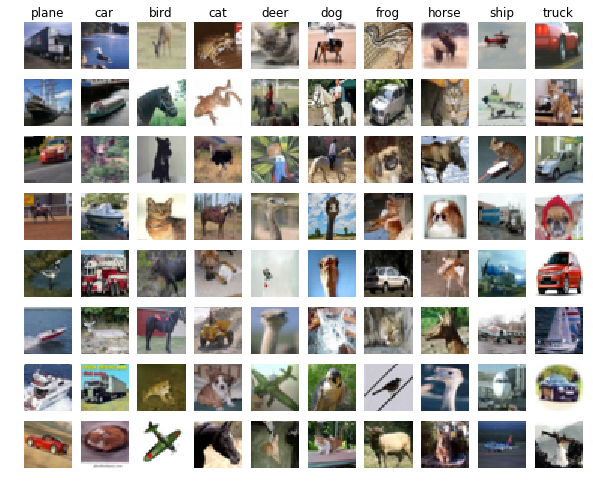

In [13]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [14]:
print X_train_feats.shape

(49000, 195)


Size = 500, Learning rate = 7.258363e-02, Reg. Strength = 9.419103e-04
iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.303621
iteration 200 / 1000: loss 2.269890
iteration 300 / 1000: loss 1.924127
iteration 400 / 1000: loss 1.746822
iteration 500 / 1000: loss 1.678512
iteration 600 / 1000: loss 1.516111
iteration 700 / 1000: loss 1.437574
iteration 800 / 1000: loss 1.380979
iteration 900 / 1000: loss 1.429895


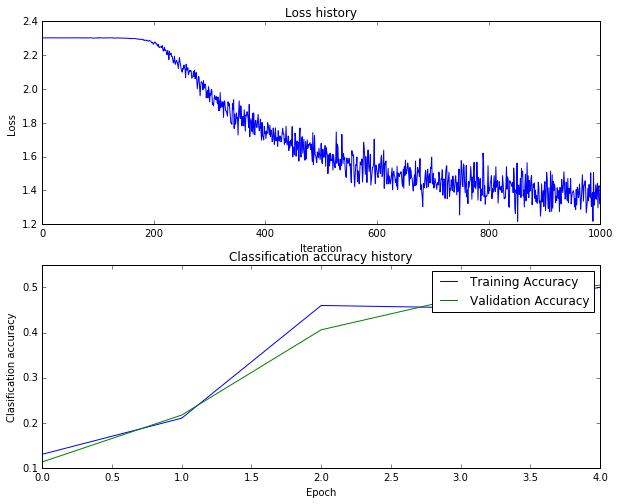

Size = 500, Learning rate = 7.258363e-02, Reg. Strength = 4.838061e+00
iteration 0 / 1000: loss 2.305050
iteration 100 / 1000: loss 2.302714
iteration 200 / 1000: loss 2.301549
iteration 300 / 1000: loss 2.301813
iteration 400 / 1000: loss 2.301666
iteration 500 / 1000: loss 2.302405
iteration 600 / 1000: loss 2.302616
iteration 700 / 1000: loss 2.303185
iteration 800 / 1000: loss 2.303055
iteration 900 / 1000: loss 2.304235


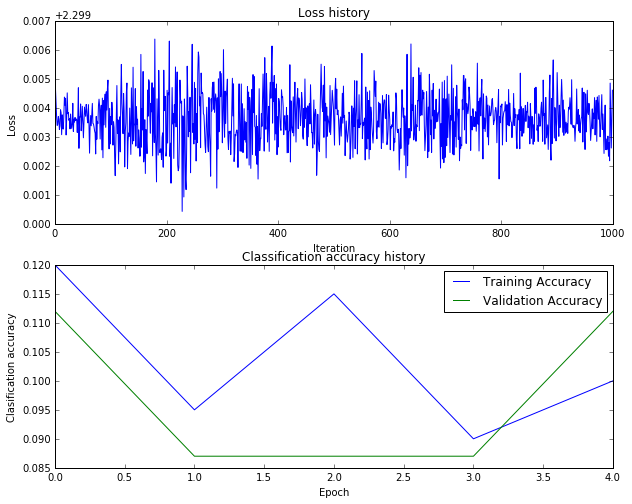

Size = 500, Learning rate = 7.258363e-02, Reg. Strength = 3.196831e-01
iteration 0 / 1000: loss 2.302750
iteration 100 / 1000: loss 2.302486
iteration 200 / 1000: loss 2.304038
iteration 300 / 1000: loss 2.302612
iteration 400 / 1000: loss 2.302654
iteration 500 / 1000: loss 2.301249
iteration 600 / 1000: loss 2.301025
iteration 700 / 1000: loss 2.297299
iteration 800 / 1000: loss 2.270208
iteration 900 / 1000: loss 2.275400


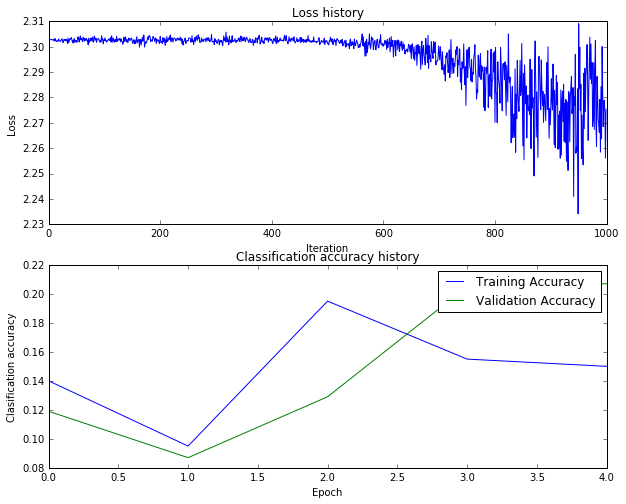

Size = 500, Learning rate = 7.258363e-02, Reg. Strength = 2.482922e-04
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.302795
iteration 200 / 1000: loss 2.265312
iteration 300 / 1000: loss 1.926867
iteration 400 / 1000: loss 1.763976
iteration 500 / 1000: loss 1.755210
iteration 600 / 1000: loss 1.454736
iteration 700 / 1000: loss 1.396377
iteration 800 / 1000: loss 1.522556
iteration 900 / 1000: loss 1.329959


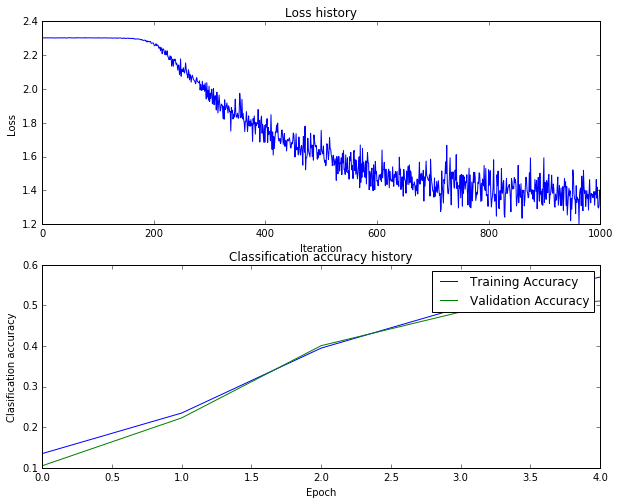

Size = 500, Learning rate = 7.258363e-02, Reg. Strength = 8.443803e+00
iteration 0 / 1000: loss 2.306913
iteration 100 / 1000: loss 2.301612
iteration 200 / 1000: loss 2.302662
iteration 300 / 1000: loss 2.301135
iteration 400 / 1000: loss 2.302796
iteration 500 / 1000: loss 2.301998
iteration 600 / 1000: loss 2.302757
iteration 700 / 1000: loss 2.303254
iteration 800 / 1000: loss 2.303620
iteration 900 / 1000: loss 2.302605


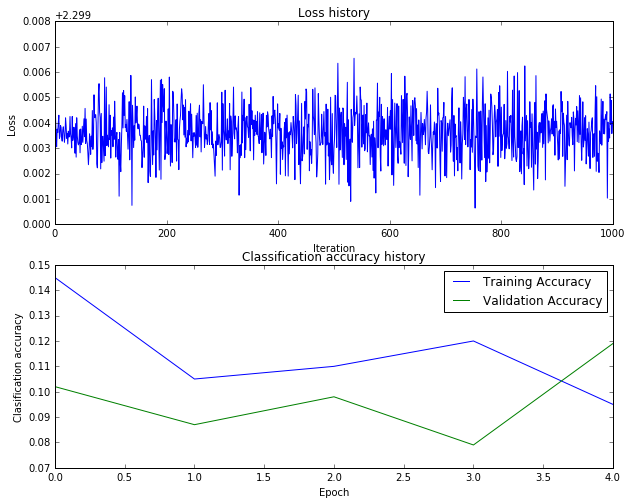

Size = 500, Learning rate = 1.352186e-04, Reg. Strength = 9.419103e-04
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.302586
iteration 200 / 1000: loss 2.302580
iteration 300 / 1000: loss 2.302584
iteration 400 / 1000: loss 2.302585
iteration 500 / 1000: loss 2.302590
iteration 600 / 1000: loss 2.302583
iteration 700 / 1000: loss 2.302587
iteration 800 / 1000: loss 2.302593
iteration 900 / 1000: loss 2.302589


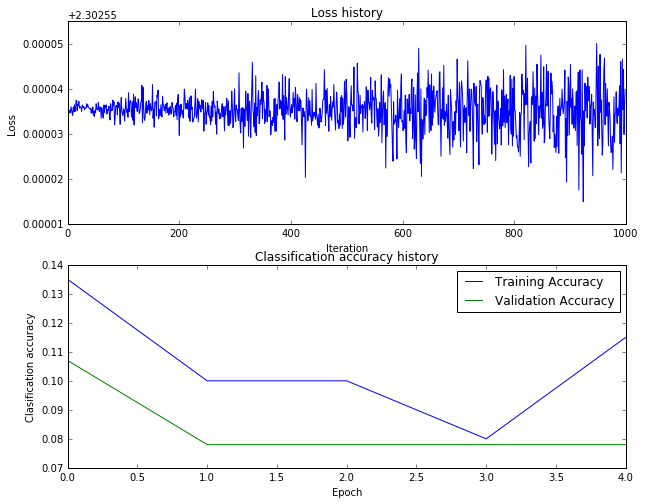

Size = 500, Learning rate = 1.352186e-04, Reg. Strength = 4.838061e+00
iteration 0 / 1000: loss 2.305058
iteration 100 / 1000: loss 2.304768
iteration 200 / 1000: loss 2.304513
iteration 300 / 1000: loss 2.304292
iteration 400 / 1000: loss 2.304106
iteration 500 / 1000: loss 2.303937
iteration 600 / 1000: loss 2.303790
iteration 700 / 1000: loss 2.303660
iteration 800 / 1000: loss 2.303552
iteration 900 / 1000: loss 2.303452


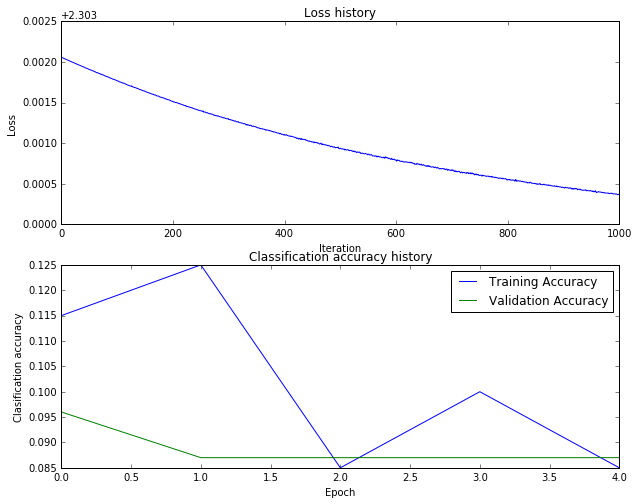

Size = 500, Learning rate = 1.352186e-04, Reg. Strength = 3.196831e-01
iteration 0 / 1000: loss 2.302749
iteration 100 / 1000: loss 2.302749
iteration 200 / 1000: loss 2.302753
iteration 300 / 1000: loss 2.302749
iteration 400 / 1000: loss 2.302749
iteration 500 / 1000: loss 2.302743
iteration 600 / 1000: loss 2.302739
iteration 700 / 1000: loss 2.302748
iteration 800 / 1000: loss 2.302742
iteration 900 / 1000: loss 2.302742


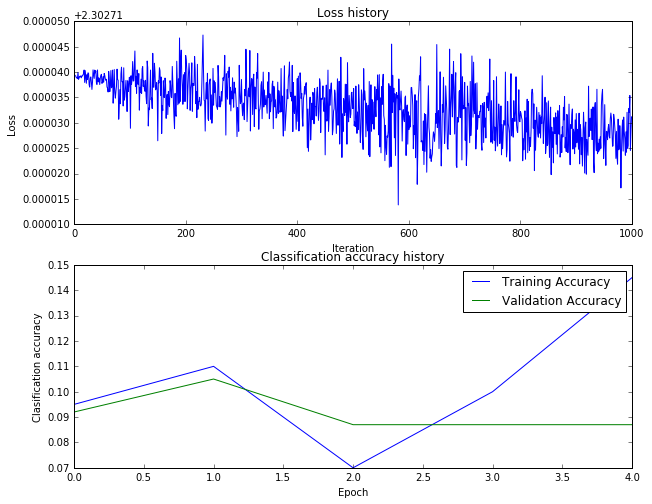

Size = 500, Learning rate = 1.352186e-04, Reg. Strength = 2.482922e-04
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.302585
iteration 200 / 1000: loss 2.302578
iteration 300 / 1000: loss 2.302588
iteration 400 / 1000: loss 2.302580
iteration 500 / 1000: loss 2.302578
iteration 600 / 1000: loss 2.302580
iteration 700 / 1000: loss 2.302581
iteration 800 / 1000: loss 2.302588
iteration 900 / 1000: loss 2.302587


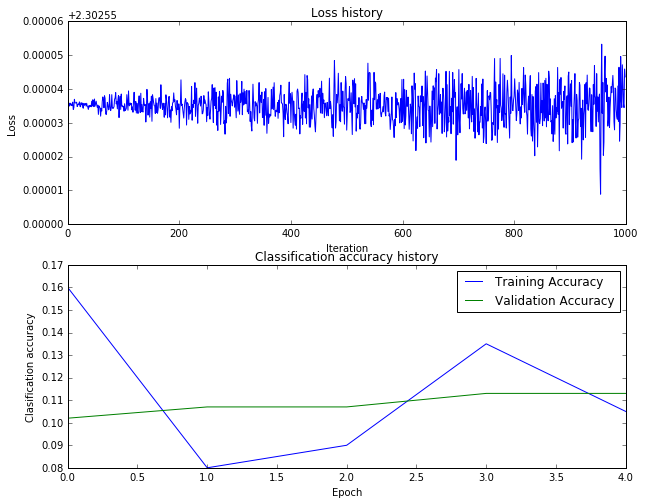

Size = 500, Learning rate = 1.352186e-04, Reg. Strength = 8.443803e+00
iteration 0 / 1000: loss 2.306898
iteration 100 / 1000: loss 2.306054
iteration 200 / 1000: loss 2.305377
iteration 300 / 1000: loss 2.304850
iteration 400 / 1000: loss 2.304423
iteration 500 / 1000: loss 2.304088
iteration 600 / 1000: loss 2.303816
iteration 700 / 1000: loss 2.303602
iteration 800 / 1000: loss 2.303428
iteration 900 / 1000: loss 2.303286


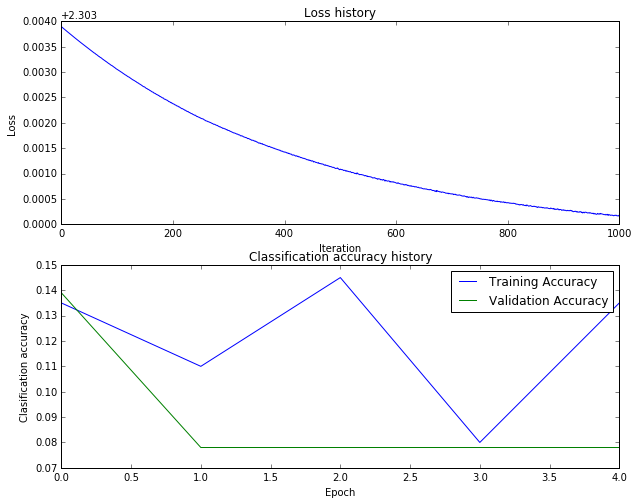

Size = 500, Learning rate = 3.976340e-04, Reg. Strength = 9.419103e-04
iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.302589
iteration 200 / 1000: loss 2.302581
iteration 300 / 1000: loss 2.302587
iteration 400 / 1000: loss 2.302578
iteration 500 / 1000: loss 2.302568
iteration 600 / 1000: loss 2.302593
iteration 700 / 1000: loss 2.302568
iteration 800 / 1000: loss 2.302581
iteration 900 / 1000: loss 2.302596


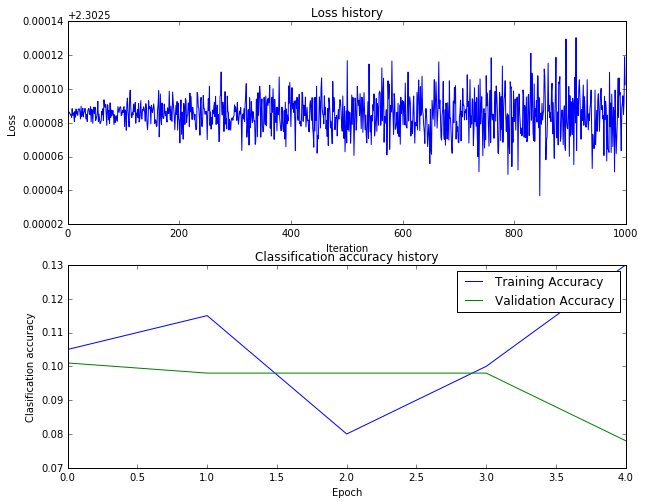

Size = 500, Learning rate = 3.976340e-04, Reg. Strength = 4.838061e+00
iteration 0 / 1000: loss 2.305070
iteration 100 / 1000: loss 2.304301
iteration 200 / 1000: loss 2.303774
iteration 300 / 1000: loss 2.303414
iteration 400 / 1000: loss 2.303163
iteration 500 / 1000: loss 2.302995
iteration 600 / 1000: loss 2.302881
iteration 700 / 1000: loss 2.302804
iteration 800 / 1000: loss 2.302758
iteration 900 / 1000: loss 2.302715


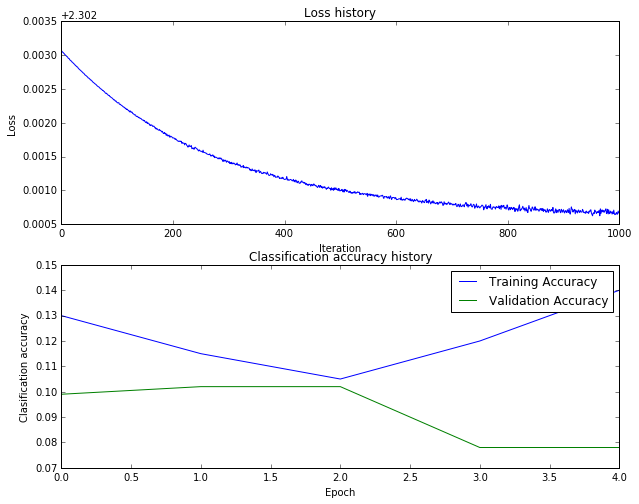

Size = 500, Learning rate = 3.976340e-04, Reg. Strength = 3.196831e-01
iteration 0 / 1000: loss 2.302750
iteration 100 / 1000: loss 2.302744
iteration 200 / 1000: loss 2.302744
iteration 300 / 1000: loss 2.302738
iteration 400 / 1000: loss 2.302711
iteration 500 / 1000: loss 2.302724
iteration 600 / 1000: loss 2.302747
iteration 700 / 1000: loss 2.302710
iteration 800 / 1000: loss 2.302753
iteration 900 / 1000: loss 2.302710


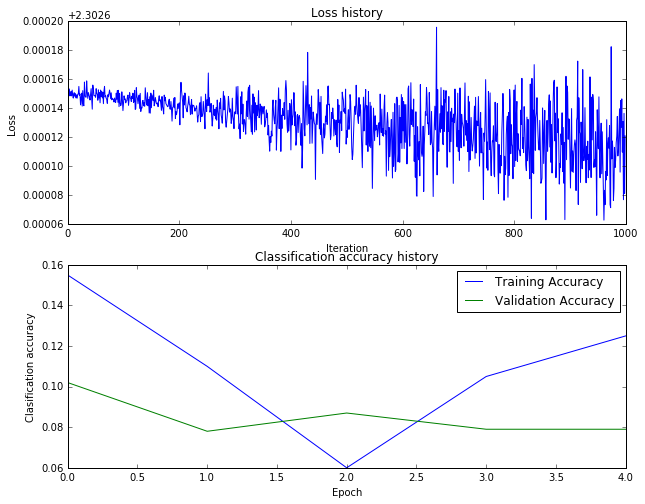

Size = 500, Learning rate = 3.976340e-04, Reg. Strength = 2.482922e-04
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.302579
iteration 200 / 1000: loss 2.302576
iteration 300 / 1000: loss 2.302567
iteration 400 / 1000: loss 2.302576
iteration 500 / 1000: loss 2.302604
iteration 600 / 1000: loss 2.302578
iteration 700 / 1000: loss 2.302595
iteration 800 / 1000: loss 2.302590
iteration 900 / 1000: loss 2.302592


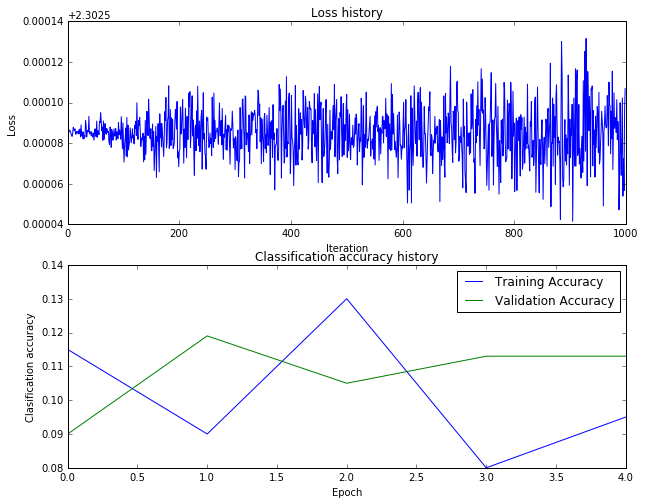

Size = 500, Learning rate = 3.976340e-04, Reg. Strength = 8.443803e+00
iteration 0 / 1000: loss 2.306912
iteration 100 / 1000: loss 2.304864
iteration 200 / 1000: loss 2.303788
iteration 300 / 1000: loss 2.303237
iteration 400 / 1000: loss 2.302928
iteration 500 / 1000: loss 2.302785
iteration 600 / 1000: loss 2.302679
iteration 700 / 1000: loss 2.302609
iteration 800 / 1000: loss 2.302637
iteration 900 / 1000: loss 2.302633


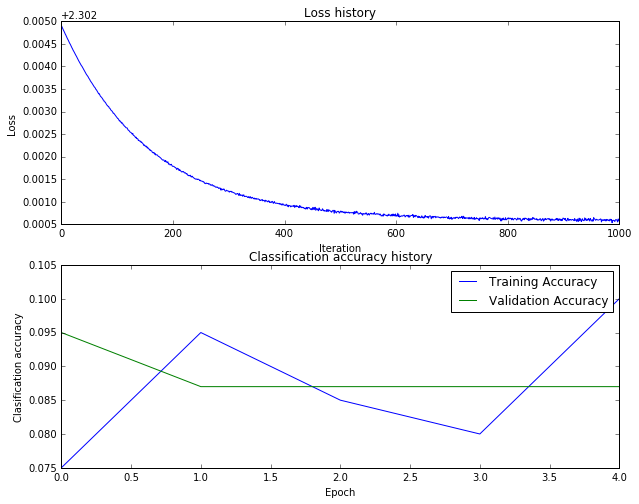

Size = 500, Learning rate = 1.453584e-02, Reg. Strength = 9.419103e-04
iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.302823
iteration 200 / 1000: loss 2.303095
iteration 300 / 1000: loss 2.302350
iteration 400 / 1000: loss 2.302342
iteration 500 / 1000: loss 2.301893
iteration 600 / 1000: loss 2.302193
iteration 700 / 1000: loss 2.300403
iteration 800 / 1000: loss 2.298745
iteration 900 / 1000: loss 2.292980


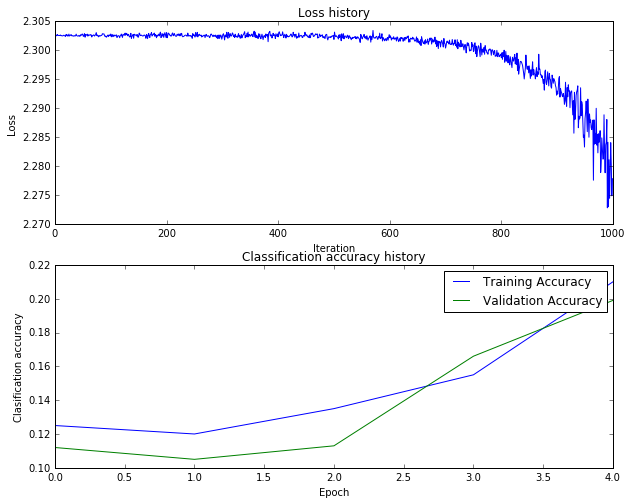

Size = 500, Learning rate = 1.453584e-02, Reg. Strength = 4.838061e+00
iteration 0 / 1000: loss 2.305062
iteration 100 / 1000: loss 2.302578
iteration 200 / 1000: loss 2.302960
iteration 300 / 1000: loss 2.302606
iteration 400 / 1000: loss 2.302889
iteration 500 / 1000: loss 2.302448
iteration 600 / 1000: loss 2.302097
iteration 700 / 1000: loss 2.302115
iteration 800 / 1000: loss 2.302976
iteration 900 / 1000: loss 2.302435


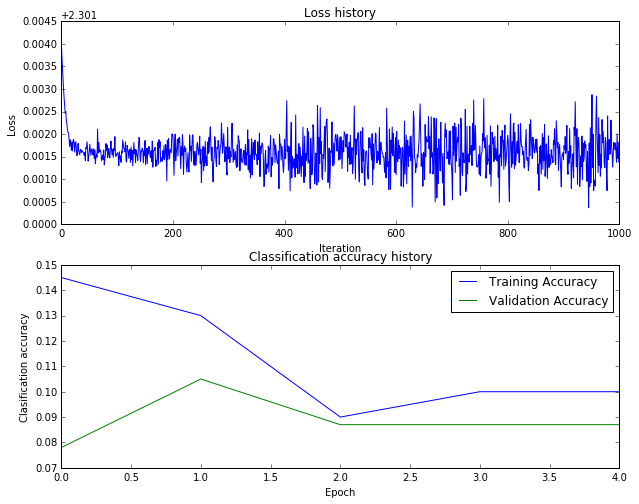

Size = 500, Learning rate = 1.453584e-02, Reg. Strength = 3.196831e-01
iteration 0 / 1000: loss 2.302748
iteration 100 / 1000: loss 2.302965
iteration 200 / 1000: loss 2.302485
iteration 300 / 1000: loss 2.302549
iteration 400 / 1000: loss 2.302475
iteration 500 / 1000: loss 2.302709
iteration 600 / 1000: loss 2.302104
iteration 700 / 1000: loss 2.302824
iteration 800 / 1000: loss 2.302684
iteration 900 / 1000: loss 2.303275


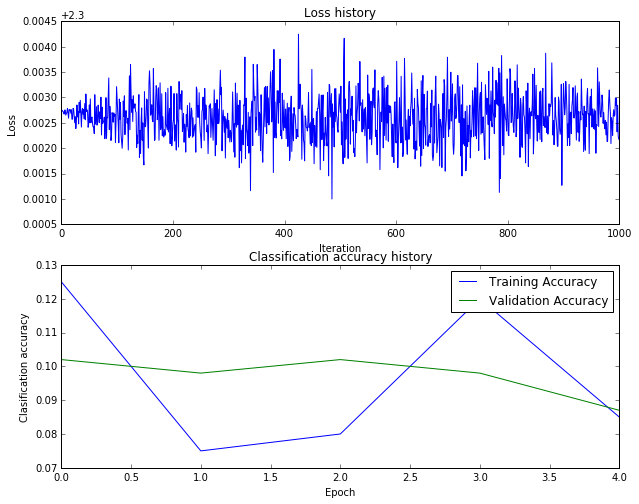

Size = 500, Learning rate = 1.453584e-02, Reg. Strength = 2.482922e-04
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.302697
iteration 200 / 1000: loss 2.302869
iteration 300 / 1000: loss 2.302621
iteration 400 / 1000: loss 2.302489
iteration 500 / 1000: loss 2.302395
iteration 600 / 1000: loss 2.302063
iteration 700 / 1000: loss 2.300435
iteration 800 / 1000: loss 2.297703
iteration 900 / 1000: loss 2.291488


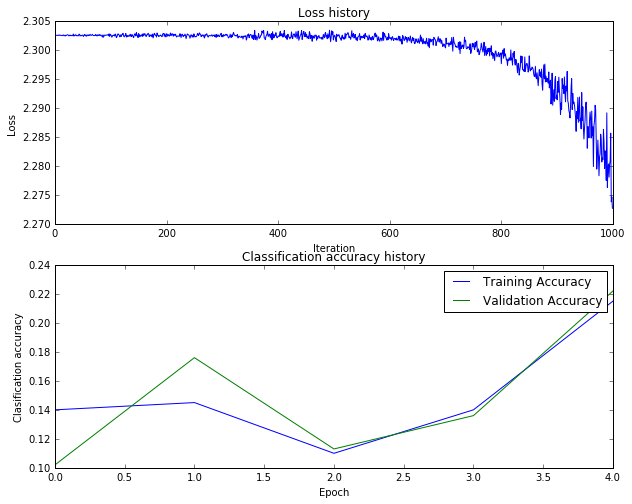

Size = 500, Learning rate = 1.453584e-02, Reg. Strength = 8.443803e+00
iteration 0 / 1000: loss 2.306869
iteration 100 / 1000: loss 2.302553
iteration 200 / 1000: loss 2.302217
iteration 300 / 1000: loss 2.303367
iteration 400 / 1000: loss 2.303000
iteration 500 / 1000: loss 2.302259
iteration 600 / 1000: loss 2.302533
iteration 700 / 1000: loss 2.302623
iteration 800 / 1000: loss 2.302439
iteration 900 / 1000: loss 2.302922


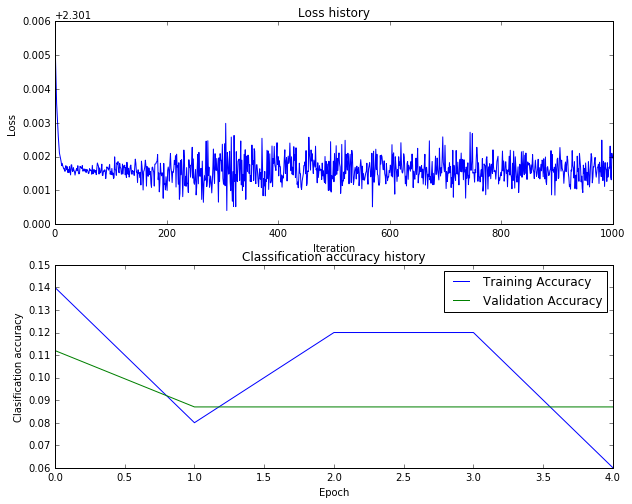

Size = 500, Learning rate = 4.887491e-02, Reg. Strength = 9.419103e-04
iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 2.301782
iteration 200 / 1000: loss 2.302976
iteration 300 / 1000: loss 2.247566
iteration 400 / 1000: loss 2.048686
iteration 500 / 1000: loss 1.839453
iteration 600 / 1000: loss 1.643967
iteration 700 / 1000: loss 1.649058
iteration 800 / 1000: loss 1.509325
iteration 900 / 1000: loss 1.608134


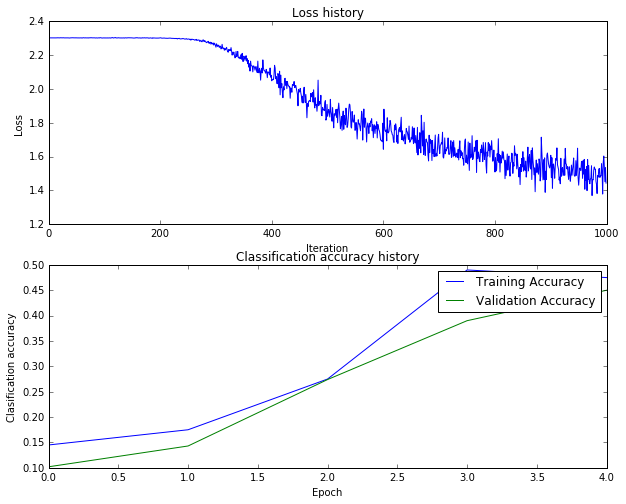

Size = 500, Learning rate = 4.887491e-02, Reg. Strength = 4.838061e+00
iteration 0 / 1000: loss 2.305065
iteration 100 / 1000: loss 2.302669
iteration 200 / 1000: loss 2.302968
iteration 300 / 1000: loss 2.302483
iteration 400 / 1000: loss 2.302369
iteration 500 / 1000: loss 2.303104
iteration 600 / 1000: loss 2.303043
iteration 700 / 1000: loss 2.302296
iteration 800 / 1000: loss 2.300775
iteration 900 / 1000: loss 2.303187


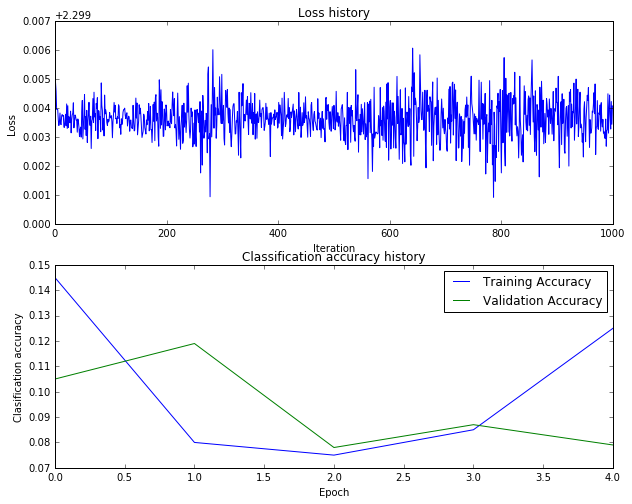

Size = 500, Learning rate = 4.887491e-02, Reg. Strength = 3.196831e-01
iteration 0 / 1000: loss 2.302749
iteration 100 / 1000: loss 2.302313
iteration 200 / 1000: loss 2.302543
iteration 300 / 1000: loss 2.302229
iteration 400 / 1000: loss 2.303031
iteration 500 / 1000: loss 2.302865
iteration 600 / 1000: loss 2.302616
iteration 700 / 1000: loss 2.302284
iteration 800 / 1000: loss 2.301736
iteration 900 / 1000: loss 2.301122


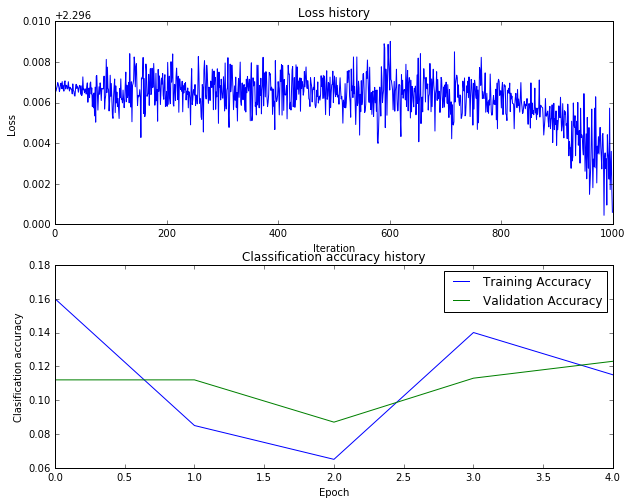

Size = 500, Learning rate = 4.887491e-02, Reg. Strength = 2.482922e-04
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.303651
iteration 200 / 1000: loss 2.301457
iteration 300 / 1000: loss 2.267935
iteration 400 / 1000: loss 2.078396
iteration 500 / 1000: loss 1.835666
iteration 600 / 1000: loss 1.631667
iteration 700 / 1000: loss 1.653237
iteration 800 / 1000: loss 1.495292
iteration 900 / 1000: loss 1.494828


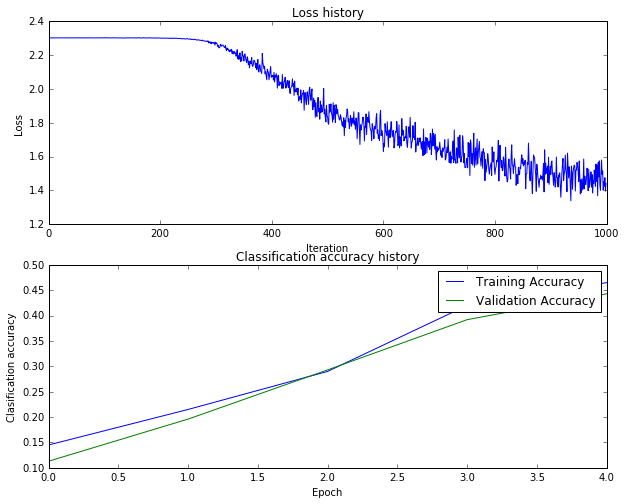

Size = 500, Learning rate = 4.887491e-02, Reg. Strength = 8.443803e+00
iteration 0 / 1000: loss 2.306907
iteration 100 / 1000: loss 2.302084
iteration 200 / 1000: loss 2.303025
iteration 300 / 1000: loss 2.302700
iteration 400 / 1000: loss 2.302898
iteration 500 / 1000: loss 2.303665
iteration 600 / 1000: loss 2.302232
iteration 700 / 1000: loss 2.302498
iteration 800 / 1000: loss 2.302146
iteration 900 / 1000: loss 2.302780


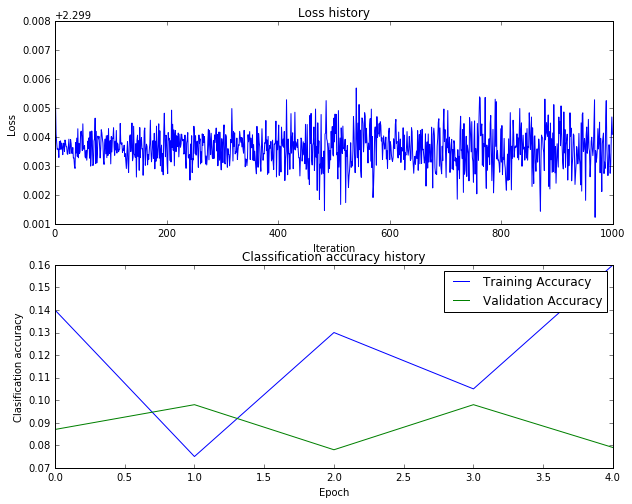

size 500 lr 1.352186e-04 reg 2.482922e-04 train accuracy: 0.099735 val accuracy: 0.113000
size 500 lr 1.352186e-04 reg 9.419103e-04 train accuracy: 0.100449 val accuracy: 0.078000
size 500 lr 1.352186e-04 reg 3.196831e-01 train accuracy: 0.100265 val accuracy: 0.087000
size 500 lr 1.352186e-04 reg 4.838061e+00 train accuracy: 0.100265 val accuracy: 0.087000
size 500 lr 1.352186e-04 reg 8.443803e+00 train accuracy: 0.100449 val accuracy: 0.078000
size 500 lr 3.976340e-04 reg 2.482922e-04 train accuracy: 0.099735 val accuracy: 0.113000
size 500 lr 3.976340e-04 reg 9.419103e-04 train accuracy: 0.100449 val accuracy: 0.078000
size 500 lr 3.976340e-04 reg 3.196831e-01 train accuracy: 0.100429 val accuracy: 0.079000
size 500 lr 3.976340e-04 reg 4.838061e+00 train accuracy: 0.100449 val accuracy: 0.078000
size 500 lr 3.976340e-04 reg 8.443803e+00 train accuracy: 0.100265 val accuracy: 0.087000
size 500 lr 1.453584e-02 reg 2.482922e-04 train accuracy: 0.198102 val accuracy: 0.223000
size 500 l

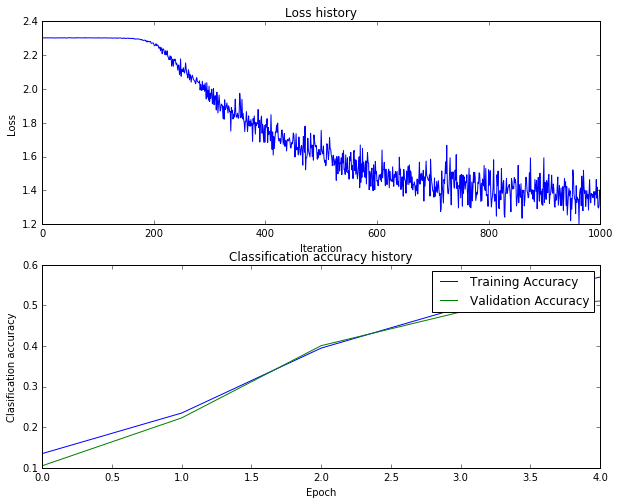

In [29]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

# from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

# def show_net_weights(net):
#   W1 = net.params['W1']
#  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
#  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
#  plt.gca().axis('off')
#  plt.show()

stats = {}
results = {}
best_stats = None
best_val = -1

# hidden_sizes = np.round(10 ** np.random.uniform(1.7,2.4,3)).astype(int)
# learning_rates = 10 ** np.random.uniform(-4,-1,5)
# regularization_strengths = 10 ** np.random.uniform(-5,2,5)
learning_rates = 10 ** np.random.uniform(-4,-1,5)
regularization_strengths = 10 ** np.random.uniform(-5,1,5)

for learning_rate in learning_rates:

    for regularization_strength in regularization_strengths:

        # Print hyperparameters
        print 'Size = %d, Learning rate = %e, Reg. Strength = %e' % (
            hidden_dim, learning_rate, regularization_strength)

        # Initialize net
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)

        # Training
        stats[learning_rate, regularization_strength] = \
            net.train(X_train_feats, y_train, X_val_feats, y_val,
                      num_iters=1000, batch_size=200,
                      learning_rate=learning_rate, learning_rate_decay=0.95,
                      reg=regularization_strength, verbose=True)

        # Testing
        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)

        # Evaluation
        train_num_correct = np.sum(y_train_pred == y_train)
        training_accuracy = float(train_num_correct) / X_train.shape[0]

        val_num_correct = np.sum(y_val_pred == y_val)
        validation_accuracy = float(val_num_correct) / X_val.shape[0]

        results[learning_rate, regularization_strength] = training_accuracy, validation_accuracy

        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_net = net
            best_stats = stats[learning_rate, regularization_strength]

        current_stats = stats[learning_rate, regularization_strength]

        # Plot the loss function and train / validation accuracies
        plt.subplot(2, 1, 1)
        plt.plot(current_stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        train_acc, = plt.plot(current_stats['train_acc_history'], label='train')
        val_acc, = plt.plot(current_stats['val_acc_history'], label='val')
        plt.legend([train_acc, val_acc], ['Training Accuracy', 'Validation Accuracy'])
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.show()

        # visualize the weights of the current network
        # show_net_weights(net)

pass

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'size %d lr %e reg %e train accuracy: %f val accuracy: %f' % (
                hidden_dim, lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train_acc, = plt.plot(best_stats['train_acc_history'], label='train')
val_acc, = plt.plot(best_stats['val_acc_history'], label='val')
plt.legend([train_acc, val_acc], ['Training Accuracy', 'Validation Accuracy'])
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# visualize the weights of the current network
# show_net_weights(best_net)

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Size = 500, Learning rate = 1.311522e-02, Reg. Strength = 2.094770e-01
iteration 0 / 1500: loss 2.302693
iteration 100 / 1500: loss 2.302773
iteration 200 / 1500: loss 2.303091
iteration 300 / 1500: loss 2.302705
iteration 400 / 1500: loss 2.302783
iteration 500 / 1500: loss 2.302397
iteration 600 / 1500: loss 2.302730
iteration 700 / 1500: loss 2.302825
iteration 800 / 1500: loss 2.302618
iteration 900 / 1500: loss 2.302303
iteration 1000 / 1500: loss 2.302595
iteration 1100 / 1500: loss 2.302633
iteration 1200 / 1500: loss 2.302151
iteration 1300 / 1500: loss 2.302099
iteration 1400 / 1500: loss 2.302410


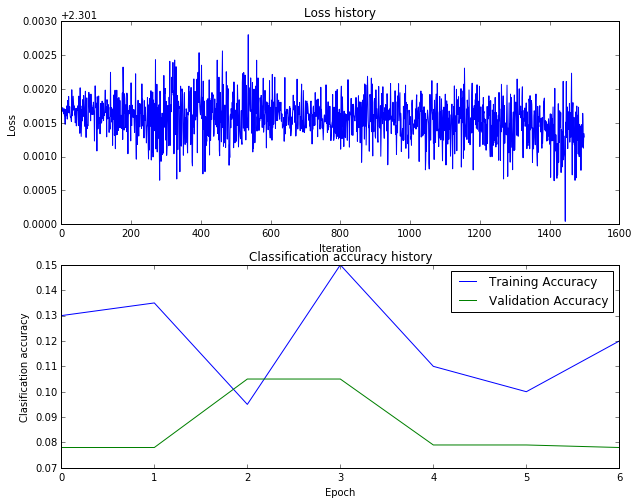

Size = 500, Learning rate = 1.311522e-02, Reg. Strength = 9.789003e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302554
iteration 200 / 1500: loss 2.302762
iteration 300 / 1500: loss 2.302715
iteration 400 / 1500: loss 2.302644
iteration 500 / 1500: loss 2.302609
iteration 600 / 1500: loss 2.302519
iteration 700 / 1500: loss 2.302128
iteration 800 / 1500: loss 2.301575
iteration 900 / 1500: loss 2.299841
iteration 1000 / 1500: loss 2.296046
iteration 1100 / 1500: loss 2.283082
iteration 1200 / 1500: loss 2.281032
iteration 1300 / 1500: loss 2.249306
iteration 1400 / 1500: loss 2.219024


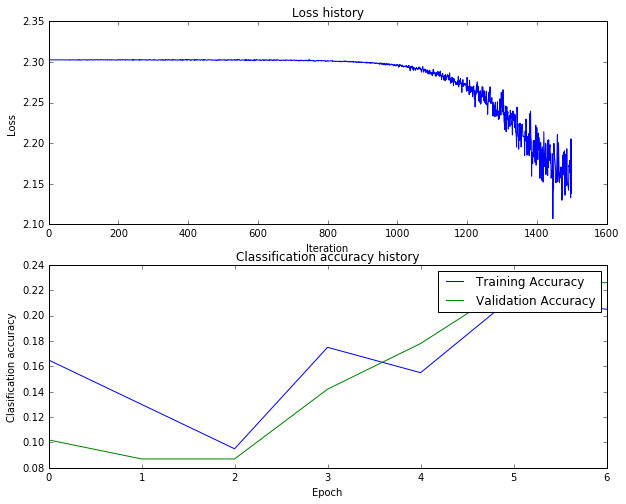

Size = 500, Learning rate = 1.311522e-02, Reg. Strength = 1.167207e-03
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302559
iteration 200 / 1500: loss 2.302669
iteration 300 / 1500: loss 2.302650
iteration 400 / 1500: loss 2.302643
iteration 500 / 1500: loss 2.302784
iteration 600 / 1500: loss 2.302450
iteration 700 / 1500: loss 2.301569
iteration 800 / 1500: loss 2.301572
iteration 900 / 1500: loss 2.300040
iteration 1000 / 1500: loss 2.295090
iteration 1100 / 1500: loss 2.288605
iteration 1200 / 1500: loss 2.268296
iteration 1300 / 1500: loss 2.232621
iteration 1400 / 1500: loss 2.217679


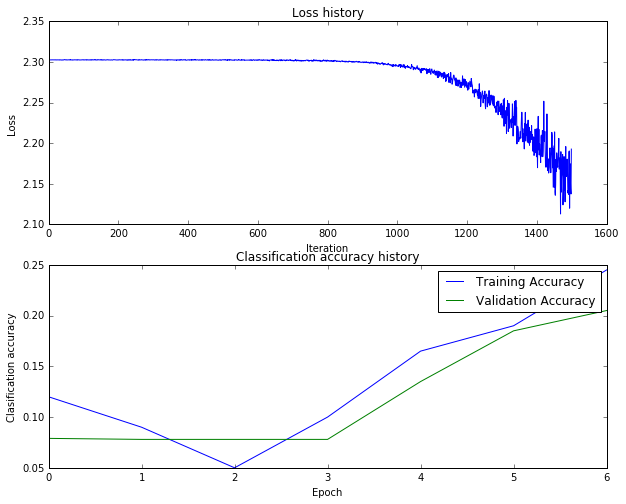

Size = 500, Learning rate = 1.311522e-02, Reg. Strength = 4.220970e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302588
iteration 200 / 1500: loss 2.303164
iteration 300 / 1500: loss 2.302924
iteration 400 / 1500: loss 2.302231
iteration 500 / 1500: loss 2.303227
iteration 600 / 1500: loss 2.302509
iteration 700 / 1500: loss 2.301701
iteration 800 / 1500: loss 2.302188
iteration 900 / 1500: loss 2.298632
iteration 1000 / 1500: loss 2.294103
iteration 1100 / 1500: loss 2.286273
iteration 1200 / 1500: loss 2.253639
iteration 1300 / 1500: loss 2.221491
iteration 1400 / 1500: loss 2.179924


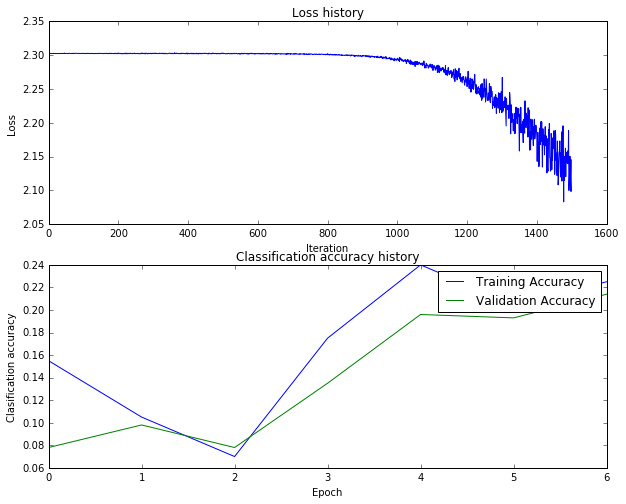

Size = 500, Learning rate = 1.311522e-02, Reg. Strength = 1.238362e-02
iteration 0 / 1500: loss 2.302592
iteration 100 / 1500: loss 2.302573
iteration 200 / 1500: loss 2.302376
iteration 300 / 1500: loss 2.302599
iteration 400 / 1500: loss 2.301979
iteration 500 / 1500: loss 2.302696
iteration 600 / 1500: loss 2.302368
iteration 700 / 1500: loss 2.302724
iteration 800 / 1500: loss 2.301207
iteration 900 / 1500: loss 2.300059
iteration 1000 / 1500: loss 2.298375
iteration 1100 / 1500: loss 2.294034
iteration 1200 / 1500: loss 2.276420
iteration 1300 / 1500: loss 2.255940
iteration 1400 / 1500: loss 2.207461


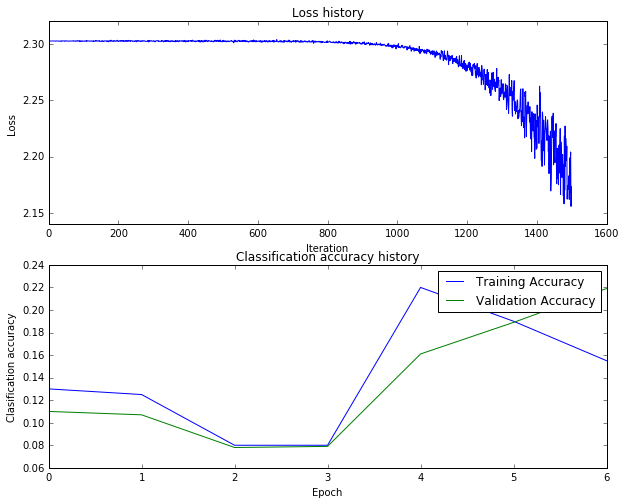

Size = 500, Learning rate = 1.096962e-02, Reg. Strength = 2.094770e-01
iteration 0 / 1500: loss 2.302693
iteration 100 / 1500: loss 2.302846
iteration 200 / 1500: loss 2.302652
iteration 300 / 1500: loss 2.302398
iteration 400 / 1500: loss 2.302501
iteration 500 / 1500: loss 2.302708
iteration 600 / 1500: loss 2.303296
iteration 700 / 1500: loss 2.302595
iteration 800 / 1500: loss 2.302524
iteration 900 / 1500: loss 2.302279
iteration 1000 / 1500: loss 2.302868
iteration 1100 / 1500: loss 2.302773
iteration 1200 / 1500: loss 2.302640
iteration 1300 / 1500: loss 2.302614
iteration 1400 / 1500: loss 2.302567


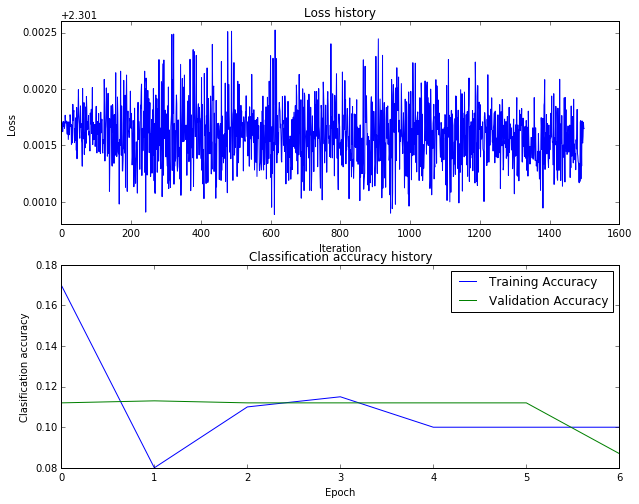

Size = 500, Learning rate = 1.096962e-02, Reg. Strength = 9.789003e-05
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302420
iteration 200 / 1500: loss 2.302411
iteration 300 / 1500: loss 2.302749
iteration 400 / 1500: loss 2.302432
iteration 500 / 1500: loss 2.302596
iteration 600 / 1500: loss 2.302555
iteration 700 / 1500: loss 2.302099
iteration 800 / 1500: loss 2.302700
iteration 900 / 1500: loss 2.301812
iteration 1000 / 1500: loss 2.301019
iteration 1100 / 1500: loss 2.299978
iteration 1200 / 1500: loss 2.296687
iteration 1300 / 1500: loss 2.292721
iteration 1400 / 1500: loss 2.286454


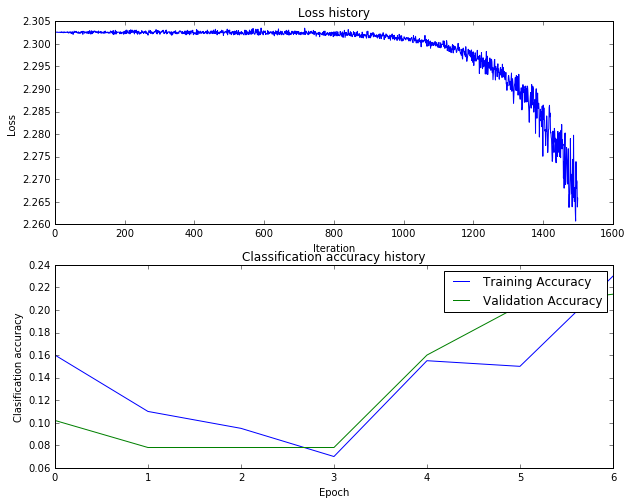

Size = 500, Learning rate = 1.096962e-02, Reg. Strength = 1.167207e-03
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302299
iteration 200 / 1500: loss 2.303013
iteration 300 / 1500: loss 2.302393
iteration 400 / 1500: loss 2.302849
iteration 500 / 1500: loss 2.302118
iteration 600 / 1500: loss 2.302496
iteration 700 / 1500: loss 2.302373
iteration 800 / 1500: loss 2.301954
iteration 900 / 1500: loss 2.301490
iteration 1000 / 1500: loss 2.301158
iteration 1100 / 1500: loss 2.299731
iteration 1200 / 1500: loss 2.295940
iteration 1300 / 1500: loss 2.290294
iteration 1400 / 1500: loss 2.282138


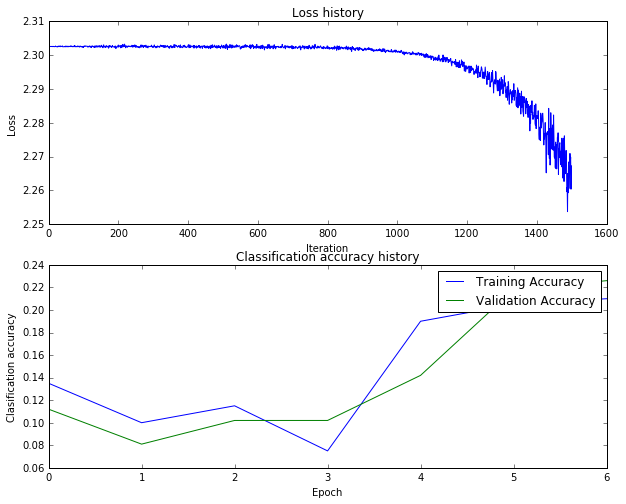

Size = 500, Learning rate = 1.096962e-02, Reg. Strength = 4.220970e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302596
iteration 200 / 1500: loss 2.302211
iteration 300 / 1500: loss 2.302903
iteration 400 / 1500: loss 2.302511
iteration 500 / 1500: loss 2.302153
iteration 600 / 1500: loss 2.302332
iteration 700 / 1500: loss 2.302203
iteration 800 / 1500: loss 2.302055
iteration 900 / 1500: loss 2.301354
iteration 1000 / 1500: loss 2.301027
iteration 1100 / 1500: loss 2.300257
iteration 1200 / 1500: loss 2.297711
iteration 1300 / 1500: loss 2.293627
iteration 1400 / 1500: loss 2.282675


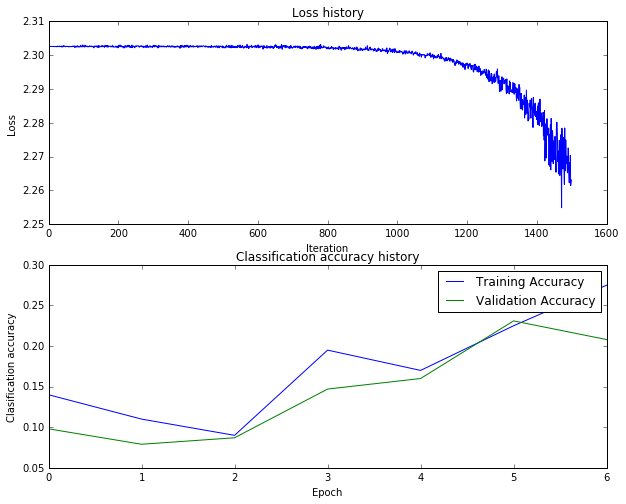

Size = 500, Learning rate = 1.096962e-02, Reg. Strength = 1.238362e-02
iteration 0 / 1500: loss 2.302591
iteration 100 / 1500: loss 2.302528
iteration 200 / 1500: loss 2.302644
iteration 300 / 1500: loss 2.302463
iteration 400 / 1500: loss 2.302402
iteration 500 / 1500: loss 2.302237
iteration 600 / 1500: loss 2.302738
iteration 700 / 1500: loss 2.302331
iteration 800 / 1500: loss 2.302743
iteration 900 / 1500: loss 2.302029
iteration 1000 / 1500: loss 2.301879
iteration 1100 / 1500: loss 2.299536
iteration 1200 / 1500: loss 2.299038
iteration 1300 / 1500: loss 2.295599
iteration 1400 / 1500: loss 2.285622


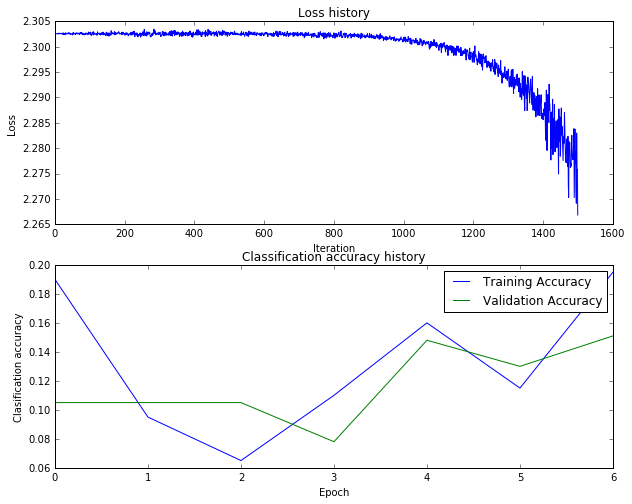

Size = 500, Learning rate = 5.570096e-02, Reg. Strength = 2.094770e-01
iteration 0 / 1500: loss 2.302692
iteration 100 / 1500: loss 2.301942
iteration 200 / 1500: loss 2.302351
iteration 300 / 1500: loss 2.303065
iteration 400 / 1500: loss 2.301111
iteration 500 / 1500: loss 2.287508
iteration 600 / 1500: loss 2.271157
iteration 700 / 1500: loss 2.251151
iteration 800 / 1500: loss 2.209366
iteration 900 / 1500: loss 2.224958
iteration 1000 / 1500: loss 2.188473
iteration 1100 / 1500: loss 2.203073
iteration 1200 / 1500: loss 2.156803
iteration 1300 / 1500: loss 2.164070
iteration 1400 / 1500: loss 2.160921


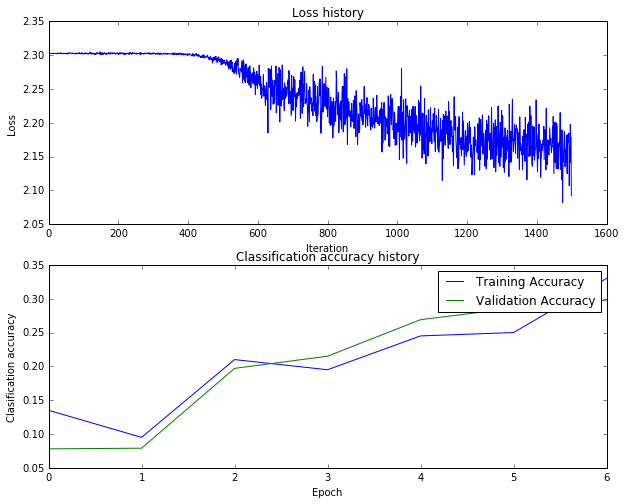

Size = 500, Learning rate = 5.570096e-02, Reg. Strength = 9.789003e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302907
iteration 200 / 1500: loss 2.300678
iteration 300 / 1500: loss 2.205794
iteration 400 / 1500: loss 2.020816
iteration 500 / 1500: loss 1.835660
iteration 600 / 1500: loss 1.626489
iteration 700 / 1500: loss 1.608205
iteration 800 / 1500: loss 1.494121
iteration 900 / 1500: loss 1.478670
iteration 1000 / 1500: loss 1.477474
iteration 1100 / 1500: loss 1.457194
iteration 1200 / 1500: loss 1.334689
iteration 1300 / 1500: loss 1.495180
iteration 1400 / 1500: loss 1.425891


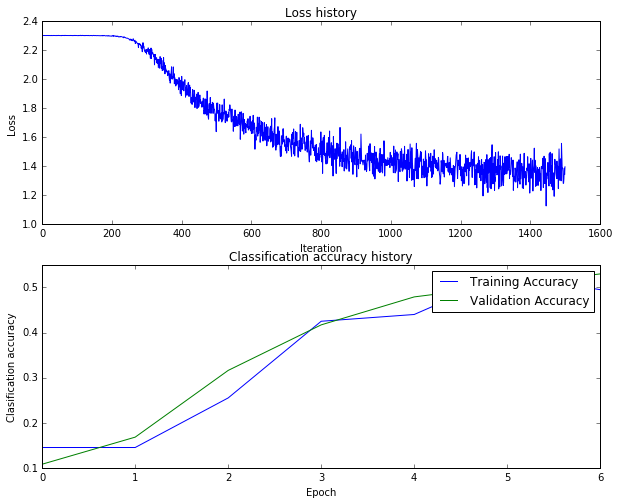

Size = 500, Learning rate = 5.570096e-02, Reg. Strength = 1.167207e-03
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302583
iteration 200 / 1500: loss 2.297764
iteration 300 / 1500: loss 2.178244
iteration 400 / 1500: loss 1.888378
iteration 500 / 1500: loss 1.787113
iteration 600 / 1500: loss 1.648519
iteration 700 / 1500: loss 1.538414
iteration 800 / 1500: loss 1.496559
iteration 900 / 1500: loss 1.474308
iteration 1000 / 1500: loss 1.455359
iteration 1100 / 1500: loss 1.430447
iteration 1200 / 1500: loss 1.413844
iteration 1300 / 1500: loss 1.287039
iteration 1400 / 1500: loss 1.451439


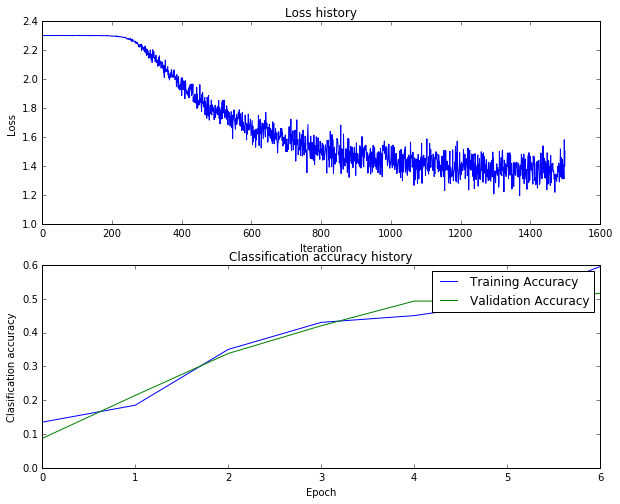

Size = 500, Learning rate = 5.570096e-02, Reg. Strength = 4.220970e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302291
iteration 200 / 1500: loss 2.300280
iteration 300 / 1500: loss 2.189295
iteration 400 / 1500: loss 1.914642
iteration 500 / 1500: loss 1.727213
iteration 600 / 1500: loss 1.755370
iteration 700 / 1500: loss 1.492139
iteration 800 / 1500: loss 1.445254
iteration 900 / 1500: loss 1.422195
iteration 1000 / 1500: loss 1.468860
iteration 1100 / 1500: loss 1.559808
iteration 1200 / 1500: loss 1.395013
iteration 1300 / 1500: loss 1.384618
iteration 1400 / 1500: loss 1.317568


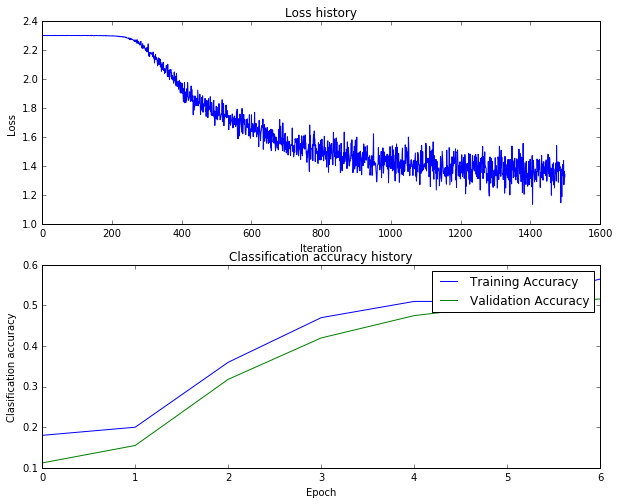

Size = 500, Learning rate = 5.570096e-02, Reg. Strength = 1.238362e-02
iteration 0 / 1500: loss 2.302591
iteration 100 / 1500: loss 2.302662
iteration 200 / 1500: loss 2.300997
iteration 300 / 1500: loss 2.200396
iteration 400 / 1500: loss 1.991181
iteration 500 / 1500: loss 1.918540
iteration 600 / 1500: loss 1.753385
iteration 700 / 1500: loss 1.695209
iteration 800 / 1500: loss 1.594513
iteration 900 / 1500: loss 1.616701
iteration 1000 / 1500: loss 1.685609
iteration 1100 / 1500: loss 1.592805
iteration 1200 / 1500: loss 1.552785
iteration 1300 / 1500: loss 1.623447
iteration 1400 / 1500: loss 1.488576


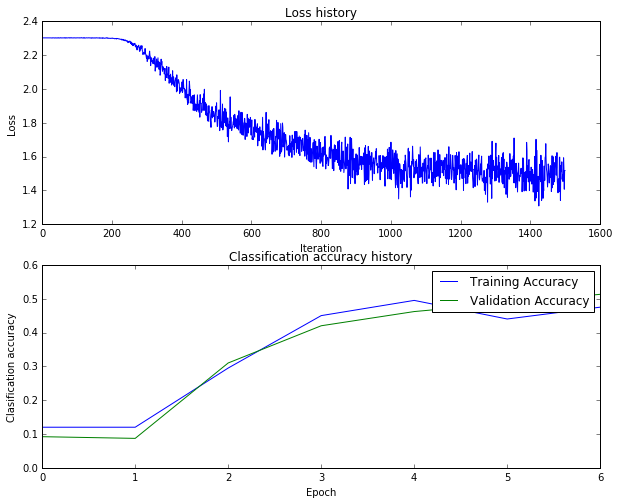

Size = 500, Learning rate = 5.458037e-02, Reg. Strength = 2.094770e-01
iteration 0 / 1500: loss 2.302693
iteration 100 / 1500: loss 2.302649
iteration 200 / 1500: loss 2.302621
iteration 300 / 1500: loss 2.302296
iteration 400 / 1500: loss 2.301184
iteration 500 / 1500: loss 2.285460
iteration 600 / 1500: loss 2.264793
iteration 700 / 1500: loss 2.243803
iteration 800 / 1500: loss 2.214462
iteration 900 / 1500: loss 2.211715
iteration 1000 / 1500: loss 2.193645
iteration 1100 / 1500: loss 2.217936
iteration 1200 / 1500: loss 2.207812
iteration 1300 / 1500: loss 2.190531
iteration 1400 / 1500: loss 2.209568


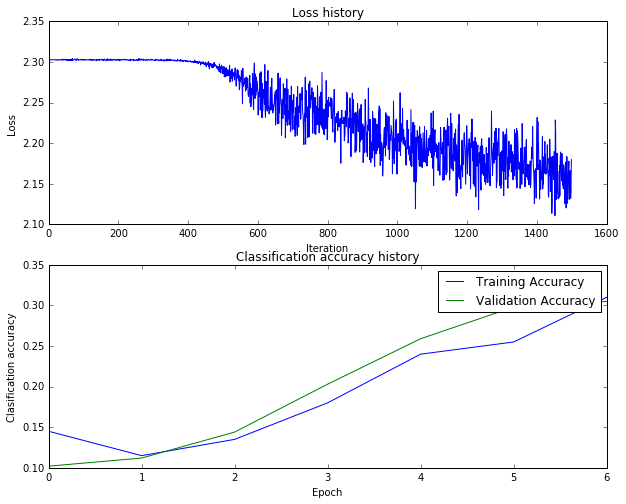

Size = 500, Learning rate = 5.458037e-02, Reg. Strength = 9.789003e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302640
iteration 200 / 1500: loss 2.300836
iteration 300 / 1500: loss 2.170472
iteration 400 / 1500: loss 2.007065
iteration 500 / 1500: loss 1.814093
iteration 600 / 1500: loss 1.565470
iteration 700 / 1500: loss 1.593160
iteration 800 / 1500: loss 1.548117
iteration 900 / 1500: loss 1.417897
iteration 1000 / 1500: loss 1.424948
iteration 1100 / 1500: loss 1.264610
iteration 1200 / 1500: loss 1.427343
iteration 1300 / 1500: loss 1.476597
iteration 1400 / 1500: loss 1.317744


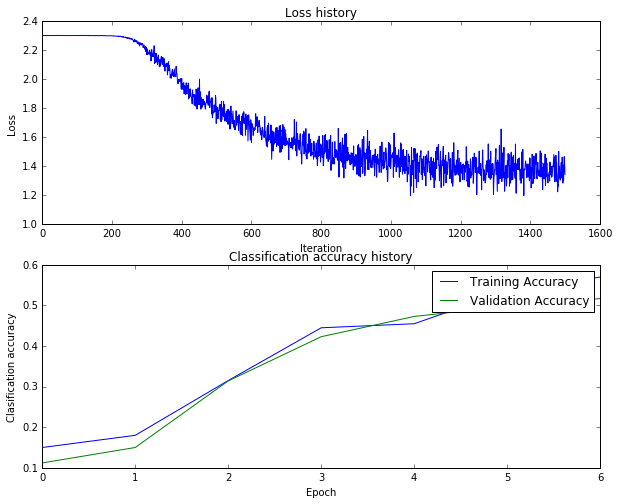

Size = 500, Learning rate = 5.458037e-02, Reg. Strength = 1.167207e-03
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302472
iteration 200 / 1500: loss 2.298767
iteration 300 / 1500: loss 2.188256
iteration 400 / 1500: loss 2.000463
iteration 500 / 1500: loss 1.838354
iteration 600 / 1500: loss 1.664018
iteration 700 / 1500: loss 1.636916
iteration 800 / 1500: loss 1.533921
iteration 900 / 1500: loss 1.420928
iteration 1000 / 1500: loss 1.441594
iteration 1100 / 1500: loss 1.418708
iteration 1200 / 1500: loss 1.289677
iteration 1300 / 1500: loss 1.302505
iteration 1400 / 1500: loss 1.404866


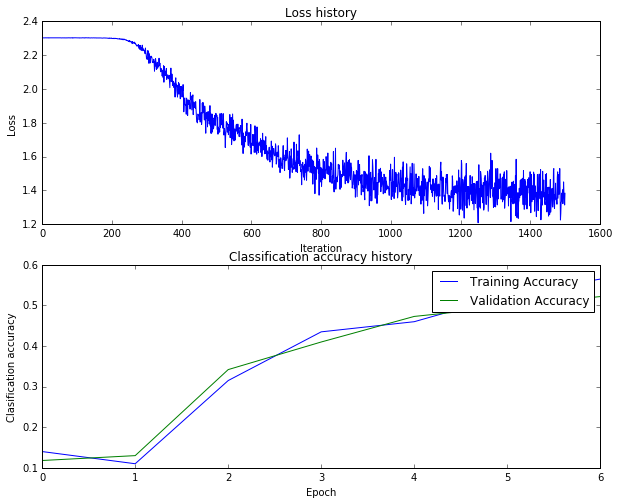

Size = 500, Learning rate = 5.458037e-02, Reg. Strength = 4.220970e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302489
iteration 200 / 1500: loss 2.300524
iteration 300 / 1500: loss 2.225181
iteration 400 / 1500: loss 1.962371
iteration 500 / 1500: loss 1.775413
iteration 600 / 1500: loss 1.669650
iteration 700 / 1500: loss 1.601192
iteration 800 / 1500: loss 1.555278
iteration 900 / 1500: loss 1.400776
iteration 1000 / 1500: loss 1.385898
iteration 1100 / 1500: loss 1.361105
iteration 1200 / 1500: loss 1.340822
iteration 1300 / 1500: loss 1.455744
iteration 1400 / 1500: loss 1.370453


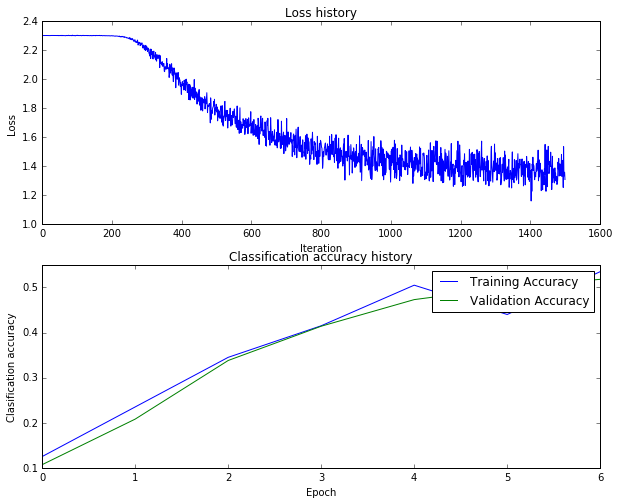

Size = 500, Learning rate = 5.458037e-02, Reg. Strength = 1.238362e-02
iteration 0 / 1500: loss 2.302591
iteration 100 / 1500: loss 2.302800
iteration 200 / 1500: loss 2.300755
iteration 300 / 1500: loss 2.231831
iteration 400 / 1500: loss 2.054750
iteration 500 / 1500: loss 1.846826
iteration 600 / 1500: loss 1.721218
iteration 700 / 1500: loss 1.738820
iteration 800 / 1500: loss 1.627779
iteration 900 / 1500: loss 1.479315
iteration 1000 / 1500: loss 1.517077
iteration 1100 / 1500: loss 1.462372
iteration 1200 / 1500: loss 1.569220
iteration 1300 / 1500: loss 1.543406
iteration 1400 / 1500: loss 1.509683


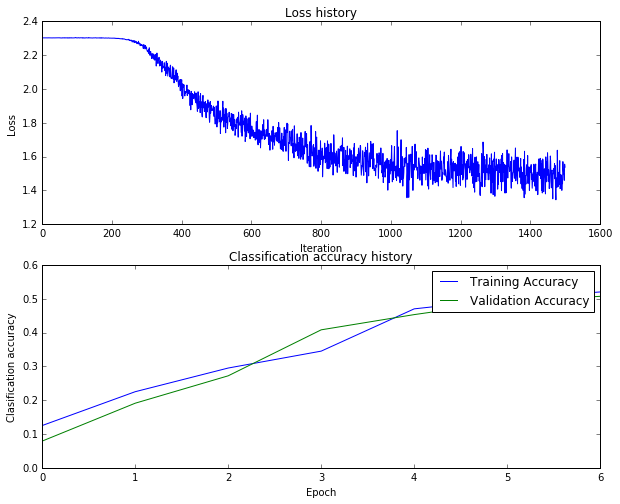

Size = 500, Learning rate = 4.043017e-02, Reg. Strength = 2.094770e-01
iteration 0 / 1500: loss 2.302692
iteration 100 / 1500: loss 2.302471
iteration 200 / 1500: loss 2.302487
iteration 300 / 1500: loss 2.302577
iteration 400 / 1500: loss 2.302132
iteration 500 / 1500: loss 2.301969
iteration 600 / 1500: loss 2.299852
iteration 700 / 1500: loss 2.292098
iteration 800 / 1500: loss 2.278387
iteration 900 / 1500: loss 2.270470
iteration 1000 / 1500: loss 2.232411
iteration 1100 / 1500: loss 2.271611
iteration 1200 / 1500: loss 2.240186
iteration 1300 / 1500: loss 2.201113
iteration 1400 / 1500: loss 2.153694


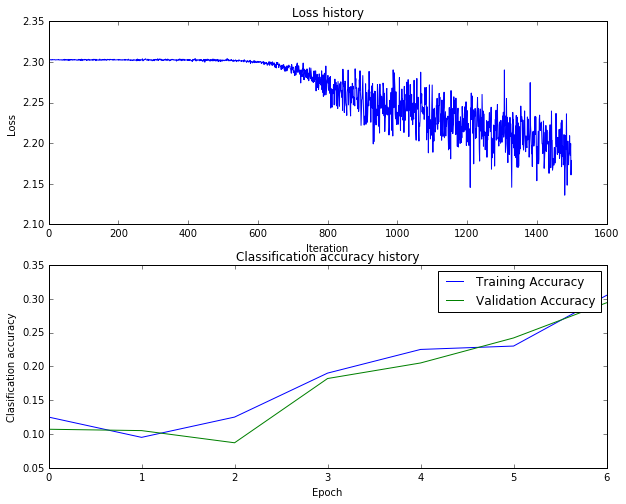

Size = 500, Learning rate = 4.043017e-02, Reg. Strength = 9.789003e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.301762
iteration 200 / 1500: loss 2.302011
iteration 300 / 1500: loss 2.295575
iteration 400 / 1500: loss 2.237098
iteration 500 / 1500: loss 2.056963
iteration 600 / 1500: loss 1.975369
iteration 700 / 1500: loss 1.748771
iteration 800 / 1500: loss 1.732483
iteration 900 / 1500: loss 1.662305
iteration 1000 / 1500: loss 1.637803
iteration 1100 / 1500: loss 1.490100
iteration 1200 / 1500: loss 1.394683
iteration 1300 / 1500: loss 1.461633
iteration 1400 / 1500: loss 1.508153


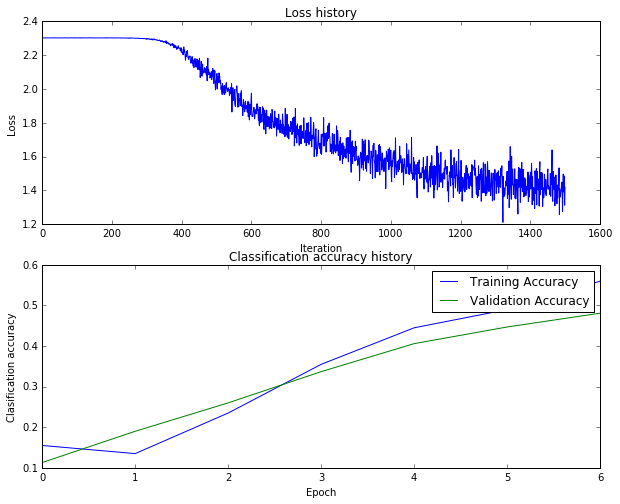

Size = 500, Learning rate = 4.043017e-02, Reg. Strength = 1.167207e-03
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.302653
iteration 200 / 1500: loss 2.302407
iteration 300 / 1500: loss 2.295437
iteration 400 / 1500: loss 2.215051
iteration 500 / 1500: loss 2.092516
iteration 600 / 1500: loss 1.954873
iteration 700 / 1500: loss 1.729530
iteration 800 / 1500: loss 1.722581
iteration 900 / 1500: loss 1.541542
iteration 1000 / 1500: loss 1.525661
iteration 1100 / 1500: loss 1.494171
iteration 1200 / 1500: loss 1.542455
iteration 1300 / 1500: loss 1.398797
iteration 1400 / 1500: loss 1.584793


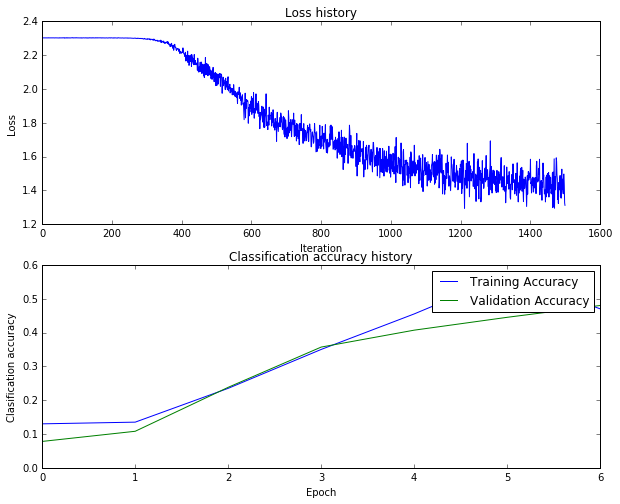

Size = 500, Learning rate = 4.043017e-02, Reg. Strength = 4.220970e-05
iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302315
iteration 200 / 1500: loss 2.302037
iteration 300 / 1500: loss 2.296512
iteration 400 / 1500: loss 2.233207
iteration 500 / 1500: loss 2.060777
iteration 600 / 1500: loss 1.913443
iteration 700 / 1500: loss 1.768722
iteration 800 / 1500: loss 1.646330
iteration 900 / 1500: loss 1.617946
iteration 1000 / 1500: loss 1.524992
iteration 1100 / 1500: loss 1.446896
iteration 1200 / 1500: loss 1.414461
iteration 1300 / 1500: loss 1.515650
iteration 1400 / 1500: loss 1.516892


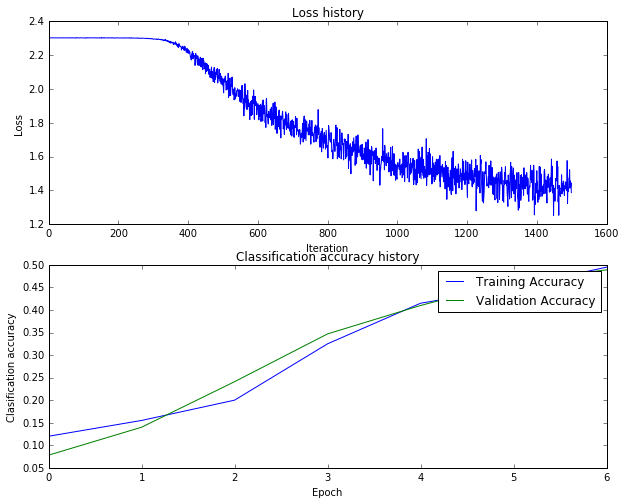

Size = 500, Learning rate = 4.043017e-02, Reg. Strength = 1.238362e-02
iteration 0 / 1500: loss 2.302591
iteration 100 / 1500: loss 2.302265
iteration 200 / 1500: loss 2.302522
iteration 300 / 1500: loss 2.298550
iteration 400 / 1500: loss 2.235353
iteration 500 / 1500: loss 2.053699
iteration 600 / 1500: loss 1.975589
iteration 700 / 1500: loss 1.813325
iteration 800 / 1500: loss 1.739481
iteration 900 / 1500: loss 1.733971
iteration 1000 / 1500: loss 1.630534
iteration 1100 / 1500: loss 1.599753
iteration 1200 / 1500: loss 1.583544
iteration 1300 / 1500: loss 1.666536
iteration 1400 / 1500: loss 1.497230


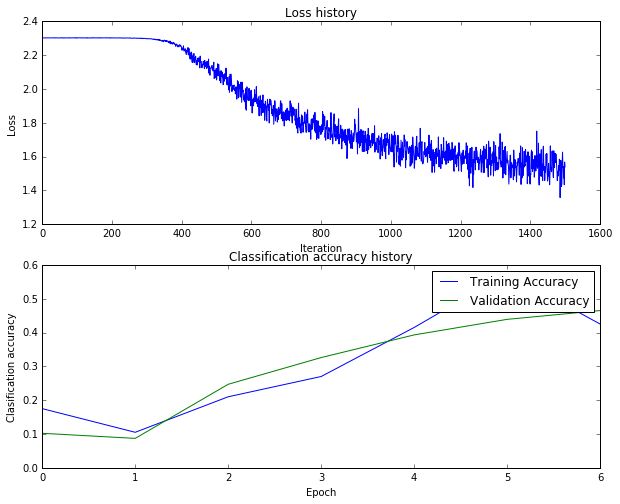

size 500 lr 1.096962e-02 reg 4.220970e-05 train accuracy: 0.210714 val accuracy: 0.223000
size 500 lr 1.096962e-02 reg 9.789003e-05 train accuracy: 0.193694 val accuracy: 0.214000
size 500 lr 1.096962e-02 reg 1.167207e-03 train accuracy: 0.206612 val accuracy: 0.226000
size 500 lr 1.096962e-02 reg 1.238362e-02 train accuracy: 0.162918 val accuracy: 0.155000
size 500 lr 1.096962e-02 reg 2.094770e-01 train accuracy: 0.140673 val accuracy: 0.128000
size 500 lr 1.311522e-02 reg 4.220970e-05 train accuracy: 0.205102 val accuracy: 0.215000
size 500 lr 1.311522e-02 reg 9.789003e-05 train accuracy: 0.213122 val accuracy: 0.227000
size 500 lr 1.311522e-02 reg 1.167207e-03 train accuracy: 0.208939 val accuracy: 0.214000
size 500 lr 1.311522e-02 reg 1.238362e-02 train accuracy: 0.208163 val accuracy: 0.217000
size 500 lr 1.311522e-02 reg 2.094770e-01 train accuracy: 0.100449 val accuracy: 0.078000
size 500 lr 4.043017e-02 reg 4.220970e-05 train accuracy: 0.488163 val accuracy: 0.493000
size 500 l

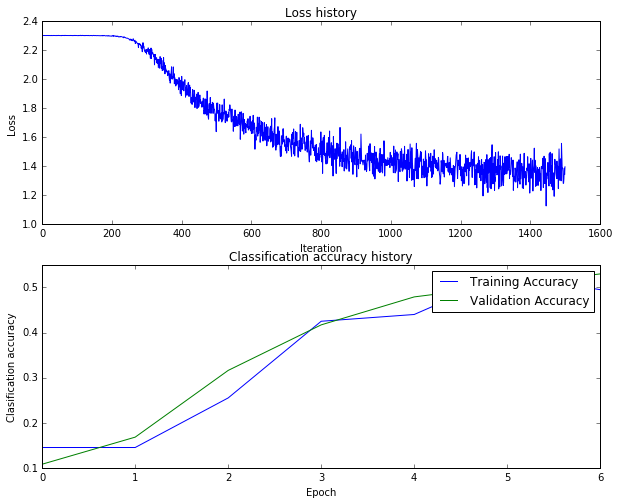

In [30]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

# from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

# def show_net_weights(net):
#   W1 = net.params['W1']
#  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
#  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
#  plt.gca().axis('off')
#  plt.show()

stats = {}
results = {}
best_stats = None
best_val = -1

# hidden_sizes = np.round(10 ** np.random.uniform(1.7,2.4,3)).astype(int)
# learning_rates = 10 ** np.random.uniform(-4,-1,5)
# regularization_strengths = 10 ** np.random.uniform(-5,2,5)
learning_rates = 10 ** np.random.uniform(-2,-1,5)
regularization_strengths = 10 ** np.random.uniform(-5,0,5)

for learning_rate in learning_rates:

    for regularization_strength in regularization_strengths:

        # Print hyperparameters
        print 'Size = %d, Learning rate = %e, Reg. Strength = %e' % (
            hidden_dim, learning_rate, regularization_strength)

        # Initialize net
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)

        # Training
        stats[learning_rate, regularization_strength] = \
            net.train(X_train_feats, y_train, X_val_feats, y_val,
                      num_iters=1500, batch_size=200,
                      learning_rate=learning_rate, learning_rate_decay=0.95,
                      reg=regularization_strength, verbose=True)

        # Testing
        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)

        # Evaluation
        train_num_correct = np.sum(y_train_pred == y_train)
        training_accuracy = float(train_num_correct) / X_train.shape[0]

        val_num_correct = np.sum(y_val_pred == y_val)
        validation_accuracy = float(val_num_correct) / X_val.shape[0]

        results[learning_rate, regularization_strength] = training_accuracy, validation_accuracy

        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_net = net
            best_stats = stats[learning_rate, regularization_strength]

        current_stats = stats[learning_rate, regularization_strength]

        # Plot the loss function and train / validation accuracies
        plt.subplot(2, 1, 1)
        plt.plot(current_stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        train_acc, = plt.plot(current_stats['train_acc_history'], label='train')
        val_acc, = plt.plot(current_stats['val_acc_history'], label='val')
        plt.legend([train_acc, val_acc], ['Training Accuracy', 'Validation Accuracy'])
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.show()

        # visualize the weights of the current network
        # show_net_weights(net)

pass

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'size %d lr %e reg %e train accuracy: %f val accuracy: %f' % (
                hidden_dim, lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train_acc, = plt.plot(best_stats['train_acc_history'], label='train')
val_acc, = plt.plot(best_stats['val_acc_history'], label='val')
plt.legend([train_acc, val_acc], ['Training Accuracy', 'Validation Accuracy'])
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# visualize the weights of the current network
# show_net_weights(best_net)

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Size = 500, Learning rate = 5.570096e-02, Reg. Strength = 9.789003e-05
iteration 0 / 4000: loss 2.302585
iteration 100 / 4000: loss 2.302502
iteration 200 / 4000: loss 2.299159
iteration 300 / 4000: loss 2.195508
iteration 400 / 4000: loss 1.919736
iteration 500 / 4000: loss 1.825320
iteration 600 / 4000: loss 1.665209
iteration 700 / 4000: loss 1.610348
iteration 800 / 4000: loss 1.492204
iteration 900 / 4000: loss 1.443054
iteration 1000 / 4000: loss 1.477308
iteration 1100 / 4000: loss 1.432739
iteration 1200 / 4000: loss 1.306181
iteration 1300 / 4000: loss 1.324093
iteration 1400 / 4000: loss 1.357843
iteration 1500 / 4000: loss 1.432935
iteration 1600 / 4000: loss 1.321947
iteration 1700 / 4000: loss 1.328159
iteration 1800 / 4000: loss 1.354796
iteration 1900 / 4000: loss 1.389012
iteration 2000 / 4000: loss 1.300920
iteration 2100 / 4000: loss 1.379604
iteration 2200 / 4000: loss 1.239390
iteration 2300 / 4000: loss 1.222025
iteration 2400 / 4000: loss 1.243689
iteration 2500 /

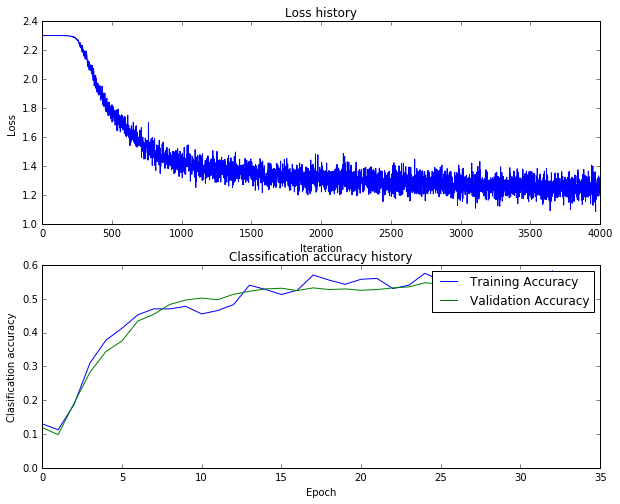

size 500 lr 5.570096e-02 reg 9.789003e-05 train accuracy: 0.560857 val accuracy: 0.553000
best validation accuracy achieved during cross-validation: 0.553000


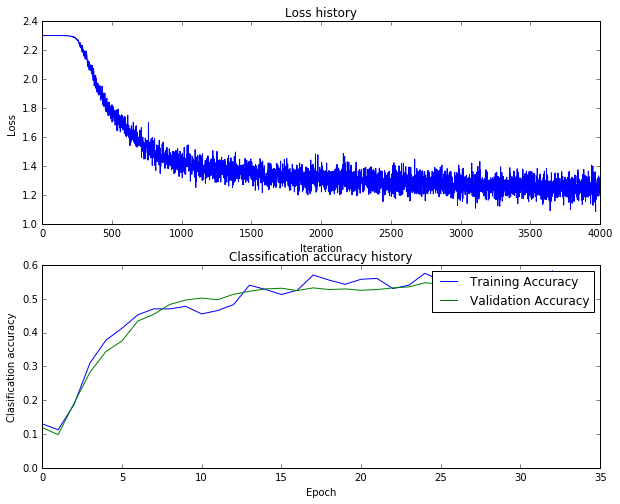

In [40]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

# from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

# def show_net_weights(net):
#   W1 = net.params['W1']
#  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
#  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
#  plt.gca().axis('off')
#  plt.show()

stats = {}
results = {}
best_stats = None
best_val = -1

# hidden_sizes = np.round(10 ** np.random.uniform(1.7,2.4,3)).astype(int)
# learning_rates = 10 ** np.random.uniform(-4,-1,5)
# regularization_strengths = 10 ** np.random.uniform(-5,2,5)
# learning_rates = 10 ** np.random.uniform(-2,-1,5)
# regularization_strengths = 10 ** np.random.uniform(-5,0,5)
learning_rates = [5.570096e-02]
regularization_strengths = [9.789003e-05]

for learning_rate in learning_rates:

    for regularization_strength in regularization_strengths:

        # Print hyperparameters
        print 'Size = %d, Learning rate = %e, Reg. Strength = %e' % (
            hidden_dim, learning_rate, regularization_strength)

        # Initialize net
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)

        # Training
        stats[learning_rate, regularization_strength] = \
            net.train(X_train_feats, y_train, X_val_feats, y_val,
                      num_iters=4000, batch_size=400,
                      learning_rate=learning_rate, learning_rate_decay=0.97,
                      reg=regularization_strength, verbose=True)

        # Testing
        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)

        # Evaluation
        train_num_correct = np.sum(y_train_pred == y_train)
        training_accuracy = float(train_num_correct) / X_train.shape[0]

        val_num_correct = np.sum(y_val_pred == y_val)
        validation_accuracy = float(val_num_correct) / X_val.shape[0]

        results[learning_rate, regularization_strength] = training_accuracy, validation_accuracy

        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_net = net
            best_stats = stats[learning_rate, regularization_strength]

        current_stats = stats[learning_rate, regularization_strength]

        # Plot the loss function and train / validation accuracies
        plt.subplot(2, 1, 1)
        plt.plot(current_stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        train_acc, = plt.plot(current_stats['train_acc_history'], label='train')
        val_acc, = plt.plot(current_stats['val_acc_history'], label='val')
        plt.legend([train_acc, val_acc], ['Training Accuracy', 'Validation Accuracy'])
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.show()

        # visualize the weights of the current network
        # show_net_weights(net)

pass

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'size %d lr %e reg %e train accuracy: %f val accuracy: %f' % (
                hidden_dim, lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train_acc, = plt.plot(best_stats['train_acc_history'], label='train')
val_acc, = plt.plot(best_stats['val_acc_history'], label='val')
plt.legend([train_acc, val_acc], ['Training Accuracy', 'Validation Accuracy'])
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# visualize the weights of the current network
# show_net_weights(best_net)

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [41]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.541


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!